## **Data Mining with Python**
### **Semana 8: Evaluación de Modelos**
**Andrés C. Medina Sanhueza**

PhD(c) Engineering Systems

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

<img src="https://pbs.twimg.com/media/EVSRXXAXgAEtSXR.jpg:large" width=700 height=400/>

In [1]:
from plotnine import *
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import warnings 

warnings.simplefilter("ignore")

In [2]:
iris = datasets.load_iris() 
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
tempDF = pd.DataFrame(iris.data, columns = iris.feature_names)
tempDF.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


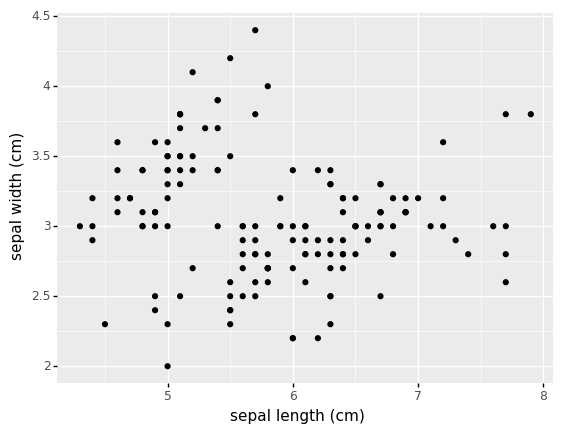

<ggplot: (8784512416244)>

In [4]:
( 
    ggplot(tempDF) + 
    aes(x = "sepal length (cm)", y = "sepal width (cm)") + 
    geom_point()
)

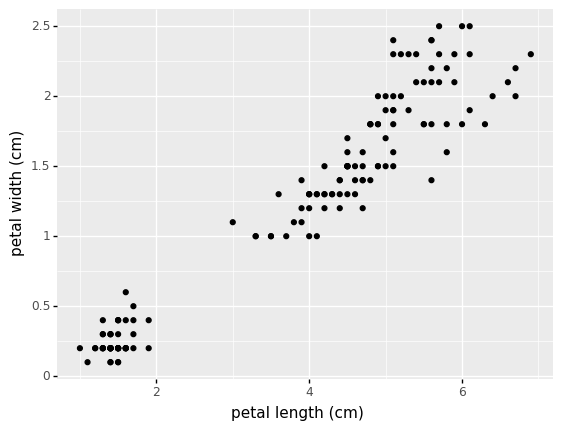

<ggplot: (8784614439379)>

In [5]:
(
    ggplot(tempDF) + 
    aes(x="petal length (cm)", y="petal width (cm)") + 
    geom_point()
)

In [6]:
KNN = KNeighborsClassifier(n_neighbors = 5, weights = "uniform")
KNN = KNN.fit(iris.data, iris.target)
prediccion = KNN.predict(iris.data)
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **`Sklearn.metrics()`**

El módulo metrics de sklearn contiene un gran número de métricas ya implementadas. La mayoría de estas funciones  solo necesitan las clases originales y predichas.

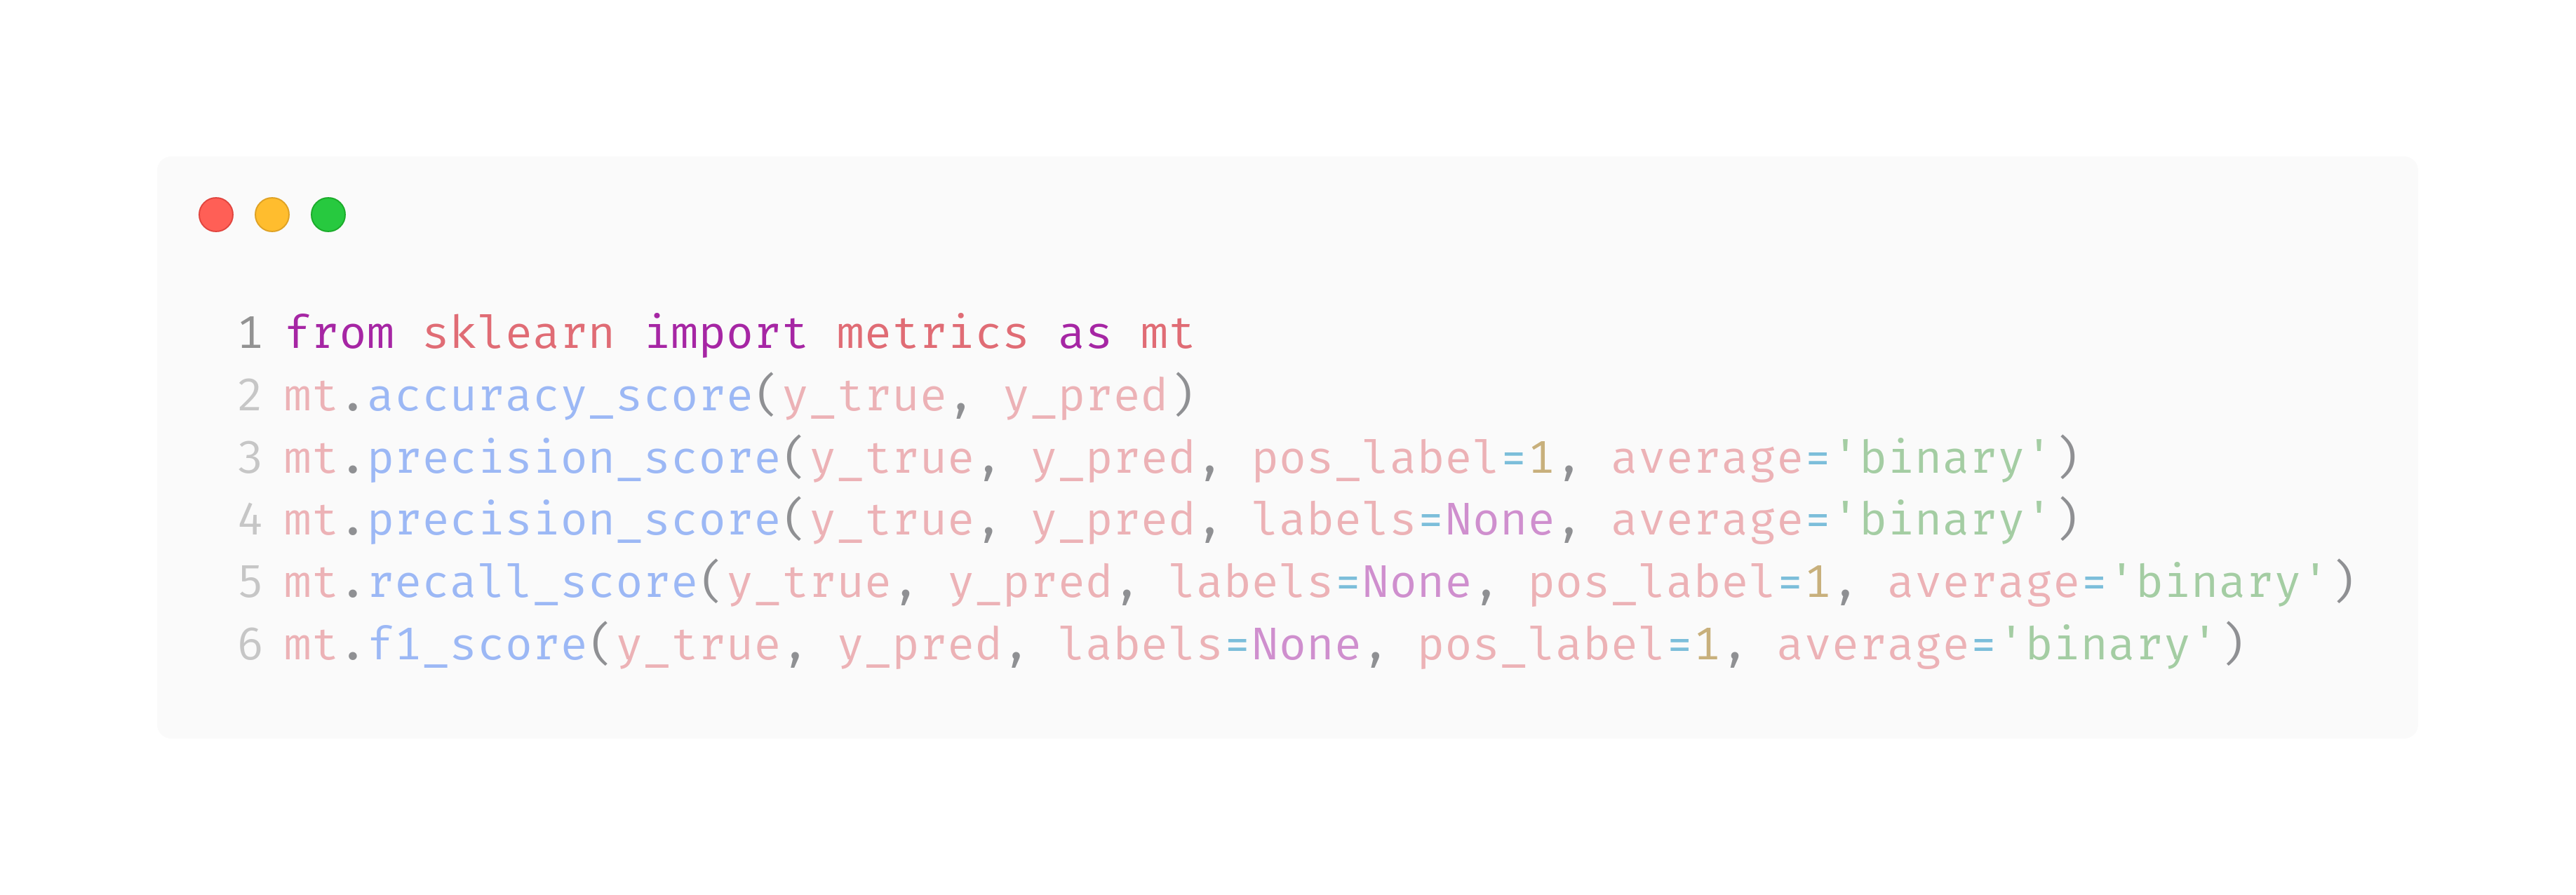

In [7]:
from IPython.display import Image
Image('accuracy.png')

Donde los hiperparámetros de estas funciones, son las siguientes:

**`accuracy_score(y_true, y_pred)`**

* `y_true:` Etiqueta reales
* `y_pred:` Etiqueta predichas por algún modelo

**`precision_score(y_true, y_pred, pos_label=1, average='binary')`**

* `y_true:` etiqueta reales
* `y_pred:` etiqueta predichas por algún modelo
* `pos_label:` etiqueta a considerar como verdadera en un problema binario (2 clases).
* average: 
    * `binary`: muestra la precisión considerando la clase de pos_label como verdadera.
    * `None:` muestra la precisión considerando cada clase como verdadera.

**`precision_score(y_true, y_pred, labels=None, average='binary')`**

* `y_true:` etiqueta reales
* `y_pred:` etiqueta predichas por algún modelo
* `labels:` lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* `average:`
    * `binary:` valor por default, produce error al tener múltiples clases.<br>
    *`micro:` calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
    * `macro:` calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
    * `weighted:` calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
    * `None:` muestra la precisión considerando cada clase como verdadera.

In [8]:
from sklearn import metrics as mt
print("Accuracy del modelo:", mt.accuracy_score(iris.target, prediccion))
print("Precisión del modelo, para la clase 0 (binaria):", mt.precision_score(iris.target == 0, prediccion == 0, pos_label=1, average="binary"))
print("Precisión del modelo, para la clase 1 (binaria):", mt.precision_score(iris.target == 1, prediccion == 1, pos_label=1, average="binary"))
print("Precisión del modelo, para la clase 2 (binaria):", mt.precision_score(iris.target == 2, prediccion == 2, pos_label=1, average="binary"))
print("Precisión del modelo, para cada clase:", mt.precision_score(iris.target,prediccion,labels=[0,1,2],average=None))

Accuracy del modelo: 0.9666666666666667
Precisión del modelo, para la clase 0 (binaria): 1.0
Precisión del modelo, para la clase 1 (binaria): 0.9591836734693877
Precisión del modelo, para la clase 2 (binaria): 0.9411764705882353
Precisión del modelo, para cada clase: [1.         0.95918367 0.94117647]


**`recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary')`**
* `y_true:` etiqueta reales
* `y_pred:` etiqueta predichas por algún modelo
* `pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* `labels:` lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* `average:` 
    * `binary:` valor por default, produce error al tener múltiples clases.
    *  `micro:` calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
    * `macro:` calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
    * `weighted:` calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
    * `None:`  muestra la precisión considerando cada clase como verdadera.

**`f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary')`**
* `y_true:` etiqueta reales
* `y_pred:` etiqueta predichas por algún modelo
* `pos_label:` etiqueta a considerar como verdadera en un problema binario (2 clases).
* `labels:` lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* `average:`
 * `binary:` valor por default, produce error al tener múltiples clases.
 * `micro:` calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.
* `macro:` calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
* `weighted:` calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
* `None:` muestra la precisión considerando cada clase como verdadera.

In [9]:
print("Precisión del modelo, para cada clase:", mt.precision_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("Recall del modelo para cada clase:", mt.recall_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("F1-score del modelo para cada clase:", mt.f1_score(iris.target,prediccion,labels=[0,1,2],average=None))

Precisión del modelo, para cada clase: [1.         0.95918367 0.94117647]
Recall del modelo para cada clase: [1.   0.94 0.96]
F1-score del modelo para cada clase: [1.         0.94949495 0.95049505]


---
### **Curva ROC**

La curva ROC es una herramienta estadística utilizada en el 
análisis de clasificar la capacidad discriminante de una 
prueba diagnóstica dicotómica. Es decir, una prueba, basada en 
una variable de decisión, cuyo objetivo es clasificar a los 
individuos de una población en dos grupos: uno que presente un 
evento de interés y otro que no. Esta capacidad discriminante 
está sujeta al valor umbral elegido de entre to dos los 
posibles resultados de la variable de decisión, es decir, la 
variable por cuyo resultado se clasifica a cada individuo en un 
grupo u otro. La curva es el gráfico resultante de representar, 
para cada valor umbral, las medidas de sensibilidad y especificidad 
de la prueba diagnóstica. Por un lado, la sensibilidad cuantifica 
la proporción de individuos que presenta el evento de interés y 
que son clasificados por la prueba como portadores de dicho evento.

Por otro lado, la especificidad cuantifica la proporción de 
individuos que no lo presentan y son clasificados por la prueba como tal.

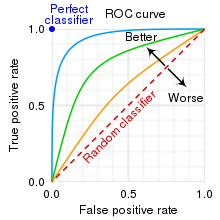

In [10]:
from IPython.display import Image
Image('Roc_curve.png')

En resumen, 
* Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos.
* Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos.

Para generar la curva ROC es necesario calcular el `true` y `false positive rate` para los distintos `threshold`. Este proceso se realiza con la función `roc_curve` de la librería metrics.

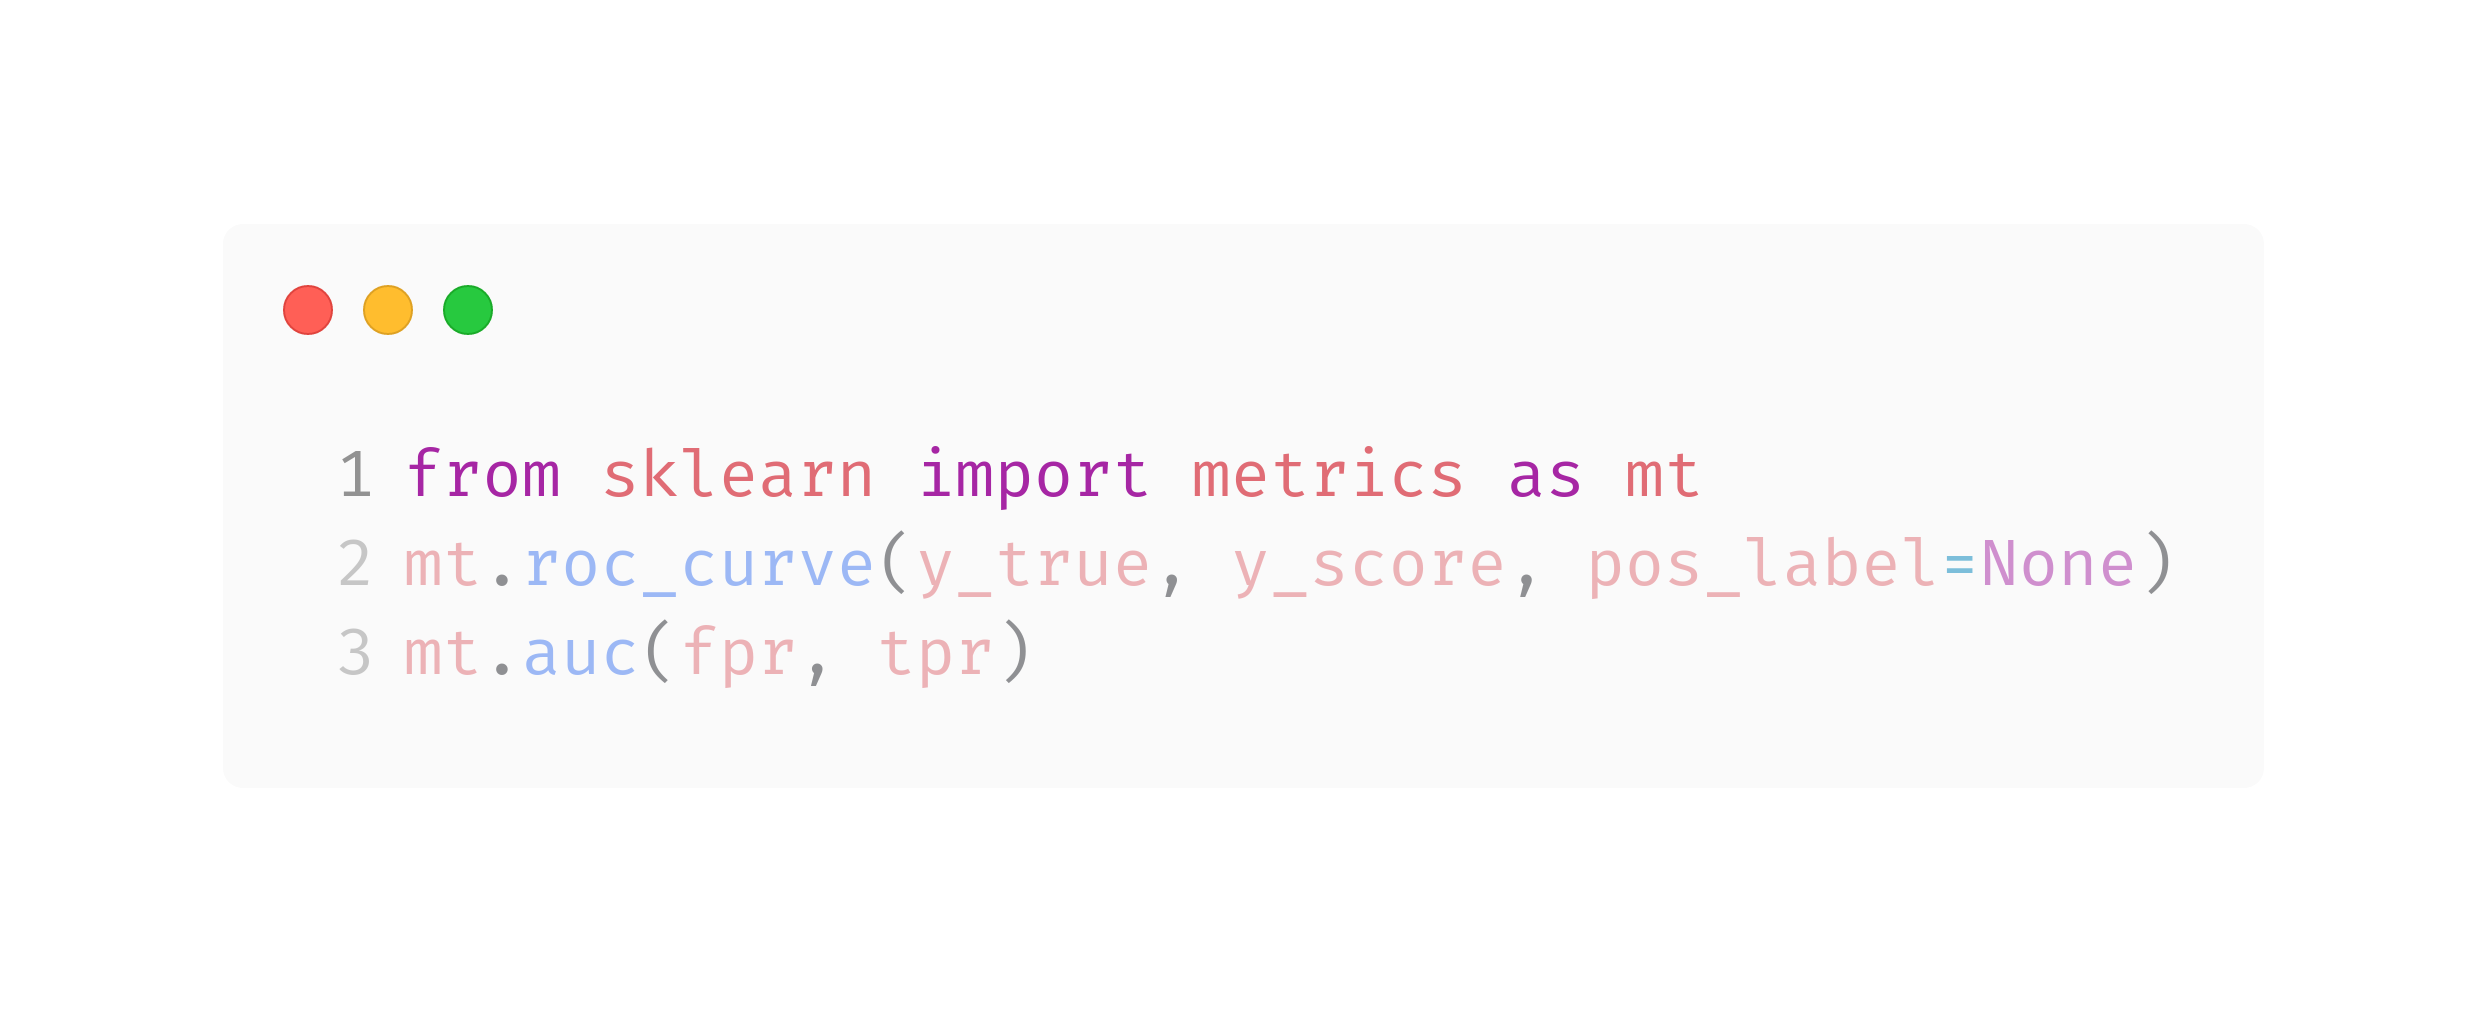

In [11]:
from IPython.display import Image
Image('roc_auc.png')

**Parametros:**

* `y_true:` etiqueta reales
* `y_pred:` un score predicho por algún modelo
* `pos_label:` etiqueta a considerar como verdadera en un problema binario (2 clases).

**Retorna:**
* `fpr:` Los valores de false positive rate para los threshold definidos por la función.
* `tpr:` Los valores de true positive rate para los threshold definidos por la función.
* `thresholds:` límites definidos por la función.

Otra función importante de metrics es `auc(x, y)`, la cual calcula el área bajo la curva para los valores de x e y.

**Parámetros**
* `x:` Coordenadas del eje X debe ser monótonamente creciente o decreciente
* `y:` Coordenadas del eje Y

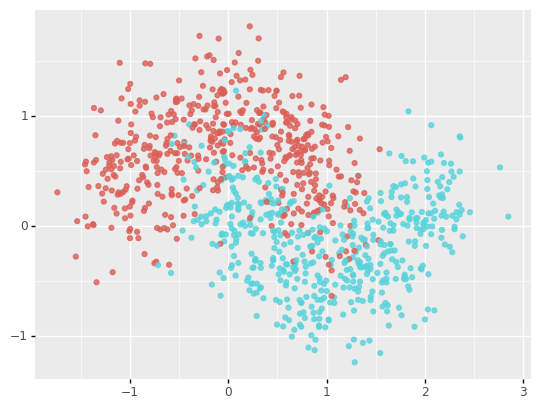

<ggplot: (8784499728836)>

In [12]:
from sklearn.datasets import make_moons
tempData = make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
(
    ggplot() + 
    aes(x = tempData[0][:,0],y = tempData[0][:,1],color = list(map(str,tempData[1]))) +
    geom_point(show_legend=False, alpha=0.8)
)

In [13]:
#Aplicando el modelo
KNN = KNeighborsClassifier(n_neighbors=10,weights="uniform")
KNN = KNN.fit(tempData[0],tempData[1])
prediccion = KNN.predict_proba(tempData[0])

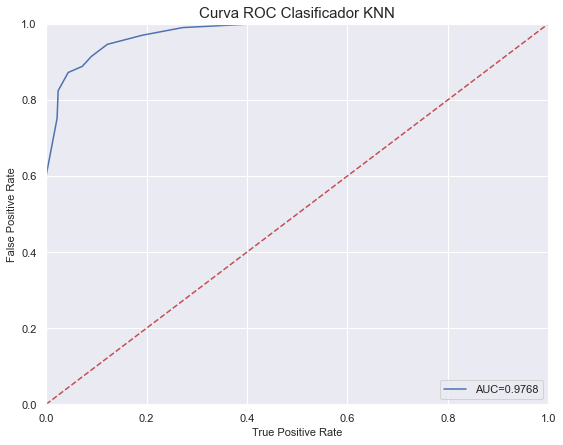

In [14]:
# Calculando los tpr and fpr
from matplotlib import pyplot as plt 
from sklearn import metrics as mt
import seaborn as sns

sns.set(rc={'figure.figsize':(9,7)})

fpr, tpr, thresholds = mt.roc_curve(tempData[1],prediccion[:,1])

roc_auc = mt.auc(fpr, tpr)
plt.title('Curva ROC Clasificador KNN', fontsize=15)
plt.plot(fpr, tpr, 'b', label='AUC=%0.4f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

El mejor límite posible está dado por un alto tpr y un bajo fpr. Una forma de buscar este valor es simplemente en forma visual, a través de un gráfico de los tpr y 1-fpr en un mismo gráfico y ver donde se intersectan.

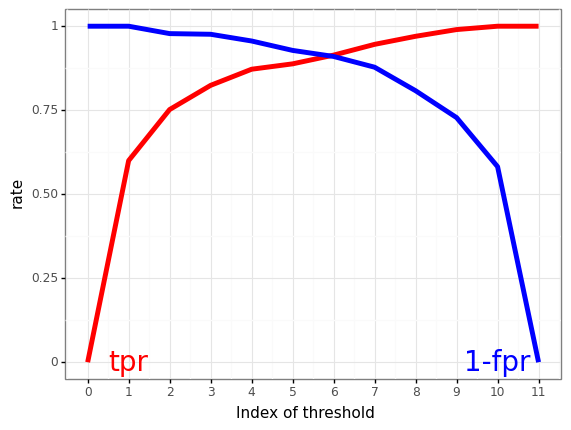

<ggplot: (8784497652815)>

In [15]:
(
    ggplot() + aes(x = range(len(thresholds))) +
    theme_bw() +
    geom_line(aes(y=tpr),color="red",size=2) +
    geom_line(aes(y=1-fpr),color="blue",size=2) + 
    annotate("text",label="tpr",x=1,y=0,color="red",size=20) + 
    annotate("text",label="1-fpr",x=len(thresholds)-2,y=0,color="blue",size=20) +
    scale_x_continuous(breaks=range(len(thresholds))) + 
    labs(x="Index of threshold",y="rate")
)

In [16]:
thresholds

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [17]:
print("Valor del límite (no sigue una escala): ",thresholds[6])
print(fpr[6],tpr[6])

Valor del límite (no sigue una escala):  0.5
0.09 0.914


---
###  **`train_test_split()`**

**Ejemplo Muestreo:**

Suponga que ud. quiere estudiar la relación entre $x$ e $y$ mediante el modelo $y=\beta_0 + \beta_1 x + \epsilon$. Para ello, asume que los verdaderos valores de los parámetros poblacionales son $\beta_0$ = 1 y $\beta_1$=2 y el componente de error proviene de una distribución $\epsilon\sim\mathcal{N}(0,4)$. La idea de este ejercicio, es elegir uno de estos dos posibles estimadores 

$$
\begin{eqnarray*}
\beta^{*} = \frac{\sum y_i}{\sum x_i}, \quad 
\tilde{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\end{eqnarray*}
$$

a) Escoja 100 valores de $x$ usando ``scipy`` para generar a partir de una distribución uniforme entre 5 y 20.

b) Acto seguido, genere 100 observaciones aleatorias de $\epsilon$  a partir de una distribución normal con media 0 y varianza 4.

c) Calcule los estimadores $\beta^{*}$ y $\tilde{\beta}$.

d) Repita el procedimiento a-b-c 5.000 veces y almacene los valores de $\beta^{*}$ y $\tilde{\beta}$. Compare las distribuciones que se generan. Utilice histogramas para visualizar la distribución muestral de $\beta^{*}$ y  $\tilde{\beta}$. ¿Qué puede concluir de este ejercicio?

In [18]:
from scipy.stats import uniform, norm
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings 

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(5.27,5.27)})
warnings.simplefilter("ignore")

# Parámetros de Inicialización
nobs   = 100   # Observaciones 
sims   = 5000  # Num. Simulaciones
beta_0 = 1     
beta_1 = 2 

In [19]:
# Solución a) y b)
x = uniform.rvs(loc=5, scale=20, size = nobs)
e = norm.rvs(loc=0, scale=2, size = nobs)
y = beta_0 + beta_1 * x + e

Beta del primer estimador es:  2.048
Beta del segundo estimador es:  2.025


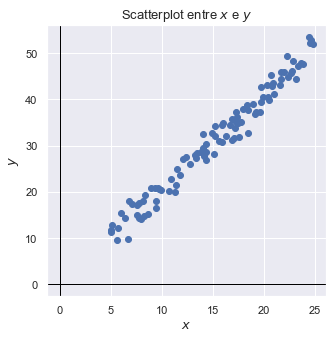

In [21]:
# Solución c)

# Defino función estimador beta para primer estimador
def beta_dot(x,y):
    denominador = np.sum(x)
    numerador = np.sum(y)  
    beta_dot  = numerador / denominador
    return (beta_dot)

# Defino función estimador beta para segundo estimador 
def beta_tilde(x,y):
    numerador   = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denominador = np.sum((x - np.mean(x))**2)
    beta_tilde = numerador / denominador
    return (beta_tilde)

# Aplico Estimadores a datos aleatorios
b_dot   = beta_dot(x,y)
b_tilde = beta_tilde(x,y) 

print("Beta del primer estimador es: ",b_dot.round(3))
print("Beta del segundo estimador es: ",b_tilde.round(3))

# Scatterplot entre x e y
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x,y)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
ax.set_title("Scatterplot entre $x$ e $y$", fontsize=13)
ax.set_xlabel("$x$", fontsize=13)
ax.set_ylabel("$y$", fontsize=13)

plt.show()

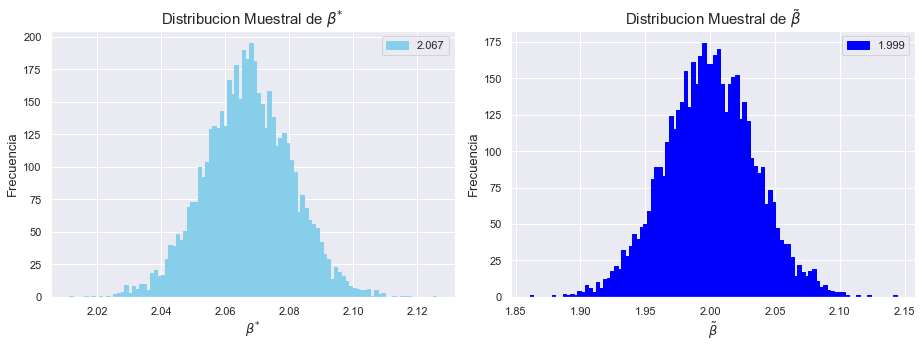

In [22]:
# Solución d)
# Genero Almacenadores vacíos
b_dot_vec    = []
b_tilde_vec  = []

for n in range(1,sims):
    # Generación de Muestras Aleatorias 
    x = uniform.rvs(loc=5, scale=20, size = nobs)
    e = norm.rvs(loc=0, scale=2, size = nobs)
    y = beta_0 + beta_1 * x + e
    
    # Estimadores 
    b_dot_loop   = beta_dot(x,y)
    b_tilde_loop = beta_tilde(x,y)
    
    # Almaceno betas por iteración
    b_dot_vec   = np.append(b_dot_vec, b_dot_loop)
    b_tilde_vec = np.append(b_tilde_vec, b_tilde_loop)
     
# Genero los plot de la distribución acumulada e histogramas 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plots asociados a las curvas acumuladas
ax1.hist(b_dot_vec, bins=100, label=np.mean(b_dot_vec).round(3),color = "skyblue", ec="skyblue")
ax1.set_xlabel(r"$\beta^{*}$", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribucion Muestral de $\beta^{*}$", fontsize=15)
ax1.legend(loc=1)

# Plot Asociados a los histogramas 
ax2.hist(b_tilde_vec, bins=100, label=np.mean(b_tilde_vec).round(3), color = "blue", ec="blue")
ax2.set_xlabel(r"$\tilde{\beta}$", fontsize = 13)
ax2.set_ylabel("Frecuencia", fontsize = 13)
ax2.set_title(r"Distribucion Muestral de $\tilde\beta$", fontsize=15)
ax2.legend(loc=1)
plt.tight_layout()

La función `train_test_split` de `sklearn.model_selection` nos permite separar los datos en entrenamiento y test. La instruccion para particion de datos, es la siguiente:

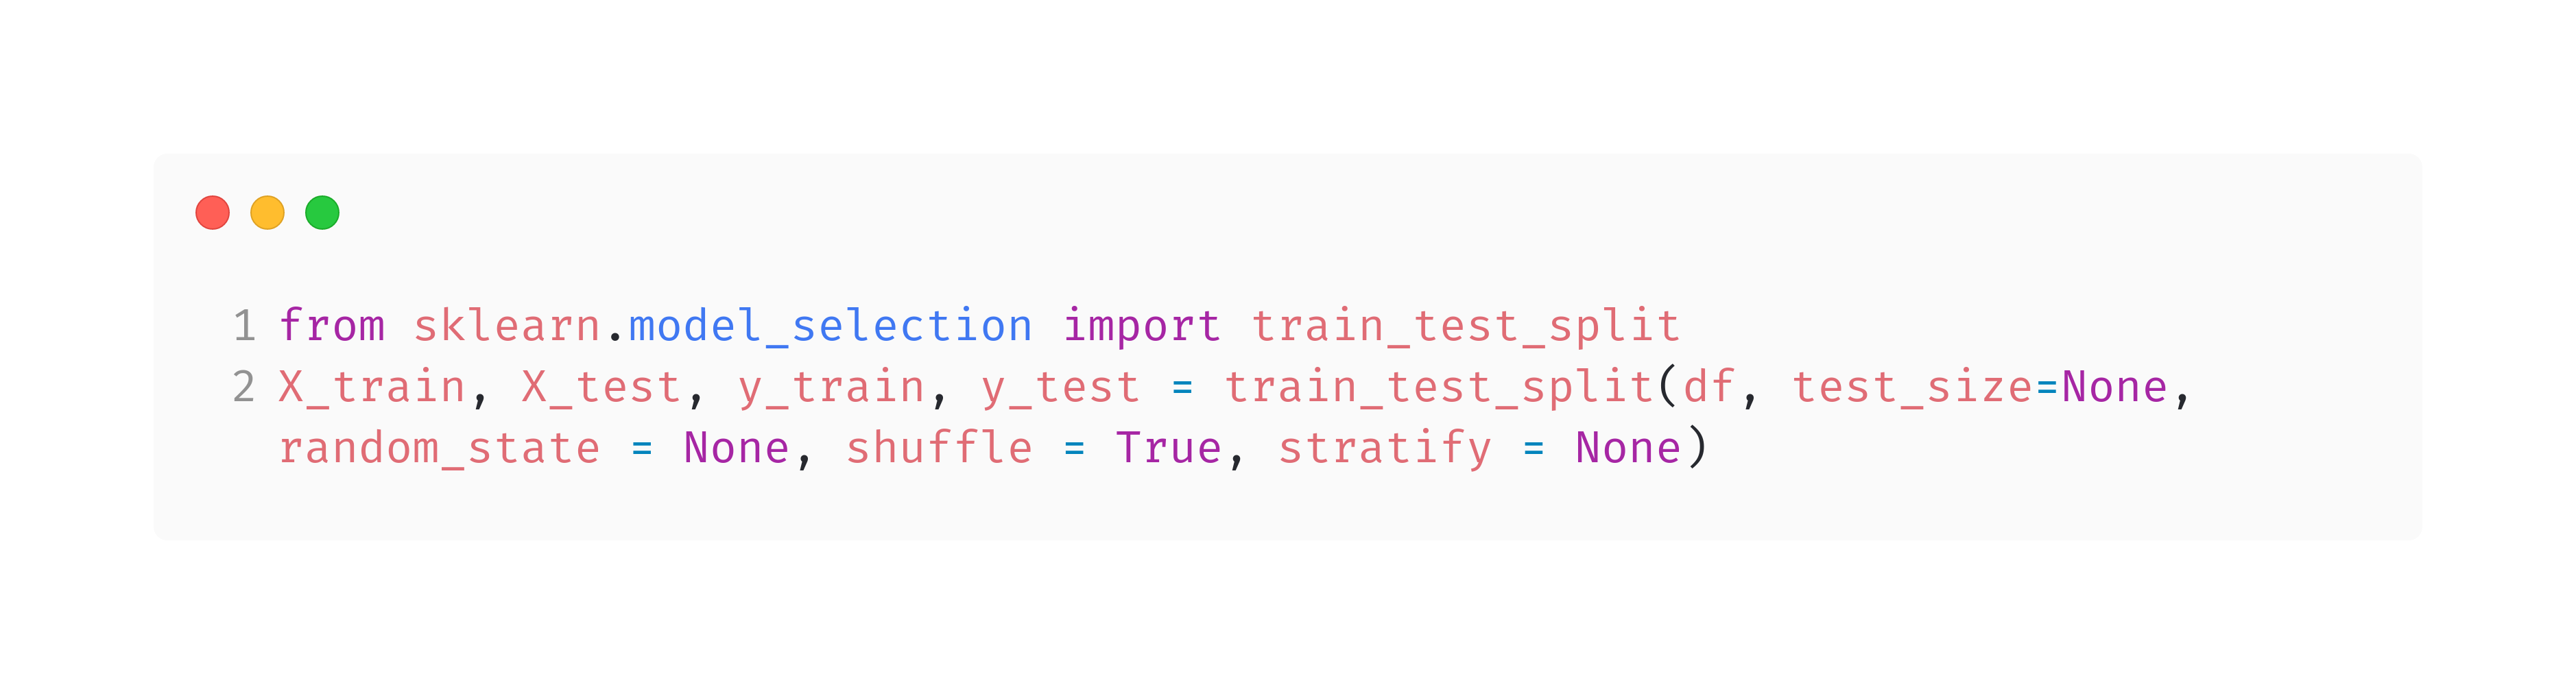

In [24]:
from IPython.display import Image
Image('split_train.png')

**Parámetros:**

* `df:` Arreglos con los datos a separar.
* `test_size:` valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de test. Si no se define es el complemento de train_size.
* `train_size:` valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de entrenamiento. Si no se define es el complemento de test_size.
* `random_state:` valor entero, permite replicar un experimiento al setear la semilla de los números aleatorios.
* `shuffle:` booleano, en caso de verdadero los datos se "barajan" antes de ser separados.
* `stratify:` Arreglo con etiquetas. En el caso que se entregue la separación matiene la porporcion de las etiquetas en cada muestra.


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

In [26]:
#Creando un objeto KNN con las condiciones iniciales
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3, weights = "uniform")
KNN = KNN.fit(X_train,y_train)

#Aplicando el modelo a otros datos
prediccion = KNN.predict(iris.data)
print("Accuracy del modelo, para cada clase:", mt.accuracy_score(iris.target,prediccion))
print("Presición del modelo, para cada clase:", mt.precision_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("Recall del modelo para cada clase:", mt.recall_score(iris.target,prediccion,labels=[0,1,2],average=None))
print("F1-score del modelo para cada clase:", mt.f1_score(iris.target,prediccion,labels=[0,1,2],average=None))

Accuracy del modelo, para cada clase: 0.9666666666666667
Presición del modelo, para cada clase: [1.         0.94117647 0.95918367]
Recall del modelo para cada clase: [1.   0.96 0.94]
F1-score del modelo para cada clase: [1.         0.95049505 0.94949495]


---

#### **Curva de Aprendizaje**

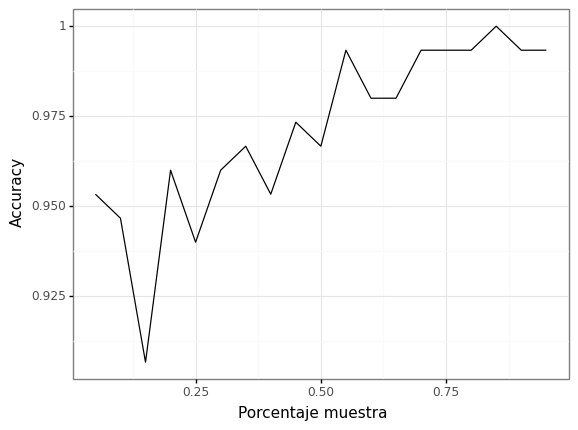

<ggplot: (8784497374163)>

In [27]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allAcc = np.zeros((len(np.arange(0.05, 1.0, 0.05)),1))

# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
index = 0
for i in np.arange(0.05,1.0,0.05):
    # Generando las distintas separaciones
    X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, train_size=i)
        
    # Entrenando y aplicando el modelo
    KNN = KNeighborsClassifier(n_neighbors=1,weights="uniform")
    KNN = KNN.fit(X_train,y_train)
    prediccion = KNN.predict(iris.data)
        
    #Evaluando el modelo
    allAcc[index] = mt.accuracy_score(iris.target,prediccion)
    index += 1

# Gráfico de los valores
(
    ggplot() + 
    aes(x=list(np.arange(0.05,1.0,0.05)),y = allAcc) + 
    geom_line() + 
    labs(x = "Porcentaje muestra", y = "Accuracy") +
 theme_bw()
)

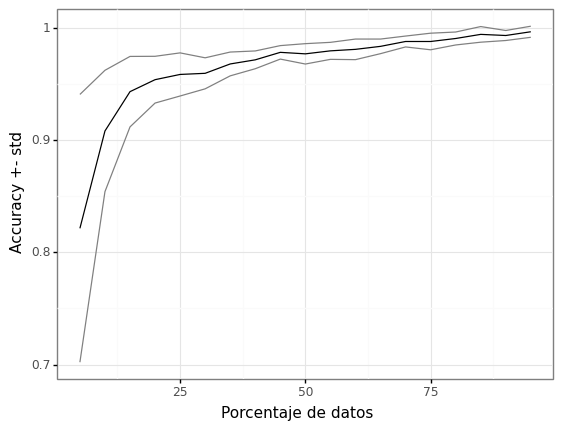

<ggplot: (8784497354237)>

In [29]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAcc = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allStdAcc  = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index  = 0
numExp = 20

# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=1, weights="uniform")
        KNN = KNN.fit(X_train,y_train)
        prediccion = KNN.predict(iris.data)
        
        #Evaluando el modelo
        tempVal[j] = mt.accuracy_score(iris.target,prediccion)
    allMeanAcc[index] = tempVal.mean()
    allStdAcc[index] = tempVal.std()
    index = index + 1
    
# Creando el dataframe a graficar
tempDF = pd.DataFrame(allMeanAcc,columns=["mean"])
tempDF['std']  = allStdAcc
tempDF['ejeX'] = np.arange(0.05,1.0,0.05)*100

# Gráfico de los valores
(ggplot(tempDF)  + 
 aes(x = "ejeX") +
 geom_line(aes(y = "mean-std"), color = "grey") +
 geom_line(aes(y = "mean+std"), color = "grey") +
 geom_line(aes(y = "mean"),color = "black") +
 labs(x = "Porcentaje de datos",y = "Accuracy +- std") +
 theme_bw()
)

---

#### **Curva de Aprendizaje (Muestras Separadas)**

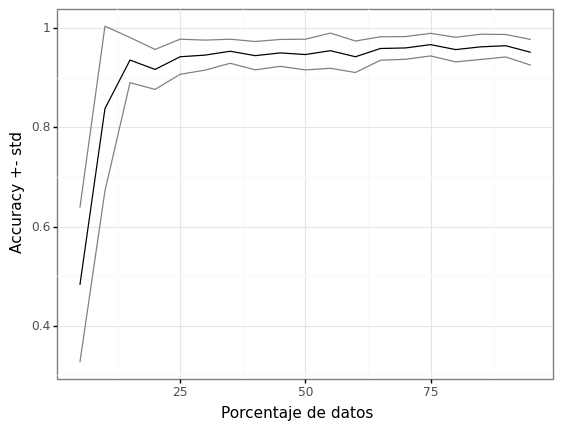

<ggplot: (8784497355292)>

In [31]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAcc = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allStdAcc  = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index  = 0
numExp = 20
# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    # Iterando sobre el número de experimentos
    for j in range(numExp):
        # Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,train_size=0.7)
        # El random state me permite que cada separación del i% sea la misma
        X_train, null, y_train, null = train_test_split(X_train,y_train,train_size=i)
        
        # Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=3,weights="uniform")
        KNN=KNN.fit(X_train,y_train)
        prediccion=KNN.predict(X_test)
        
        # Evaluando el modelo
        tempVal[j] = mt.accuracy_score(y_test,prediccion)
    allMeanAcc[index] = tempVal.mean()
    allStdAcc[index] = tempVal.std()
    index = index + 1
    
# Creando el dataframe a graficar
tempDF = pd.DataFrame(allMeanAcc,columns=["mean"])
tempDF['std'] = allStdAcc
tempDF['ejeX'] = np.arange(0.05,1.0,0.05)*100

# Gráfico de los valores
(
    ggplot(tempDF) + 
    aes(x="ejeX") +
    geom_line(aes(y = "mean-std"), color = "grey") +
    geom_line(aes(y = "mean+std"), color = "grey") +
    geom_line(aes(y = "mean"),color = "black") +
    labs(x = "Porcentaje de datos",y = "Accuracy +- std") +
    theme_bw()
)

---

#### **Comparando Curva de Entrenamiento y Test**

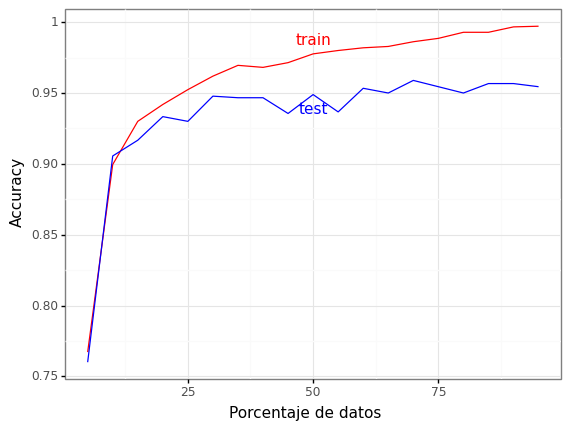

<ggplot: (8784497656089)>

In [33]:
# Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAccTrain = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allMeanAccTest  = np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index  = 0
numExp = 20
# Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    tempVal2=np.zeros((numExp,1))    
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,train_size=0.7)
        X_train2, null, y_train2, null = train_test_split(X_train,y_train,train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=1,weights="uniform")
        KNN = KNN.fit(X_train2,y_train2)
        prediccion = KNN.predict(X_test)
        tempVal[j] = mt.accuracy_score(y_test,prediccion)
        prediccion = KNN.predict(X_train)
        tempVal2[j] = mt.accuracy_score(y_train,prediccion)        
    allMeanAccTest[index]  = tempVal.mean()    
    allMeanAccTrain[index] = tempVal2.mean()
    index = index+1

#Creando el dataframe a graficar
tempDF = pd.DataFrame(allMeanAccTrain,columns=["meanTrain"])
tempDF['meanTest'] = allMeanAccTest
tempDF['ejeX'] = np.arange(0.05,1.0,0.05)*100

#Gráfico de los valores
(
    ggplot(tempDF) + 
    aes(x="ejeX")  +
    geom_line(aes(y = "meanTrain"),color = "red") +
    geom_line(aes(y = "meanTest"),color = "blue")  + 
    labs(x = "Porcentaje de datos",y = "Accuracy") +
    annotate("text",label = "train",x = 50,y = tempDF.meanTrain[9] + 0.01,color = "red")+
    annotate("text",label = "test", x = 50,y = tempDF.meanTest[9] - 0.01,color = "blue")+
    theme_bw()
)

---

#### **KFold Cross-Validation**

El objeto KFold de sklearn.model_selection permite separar los datos en K-fold. A pesar de haber otras funciones que también permiten aplicar y evaluar k-fold cross validation en forma sencilla, esta separación/evaluación no se podría usar con otros modelos que no fueran de sklearn.

La función no separa los datos, simplemente retorna los índices de cada fold, la separación se hace de forma posterior.

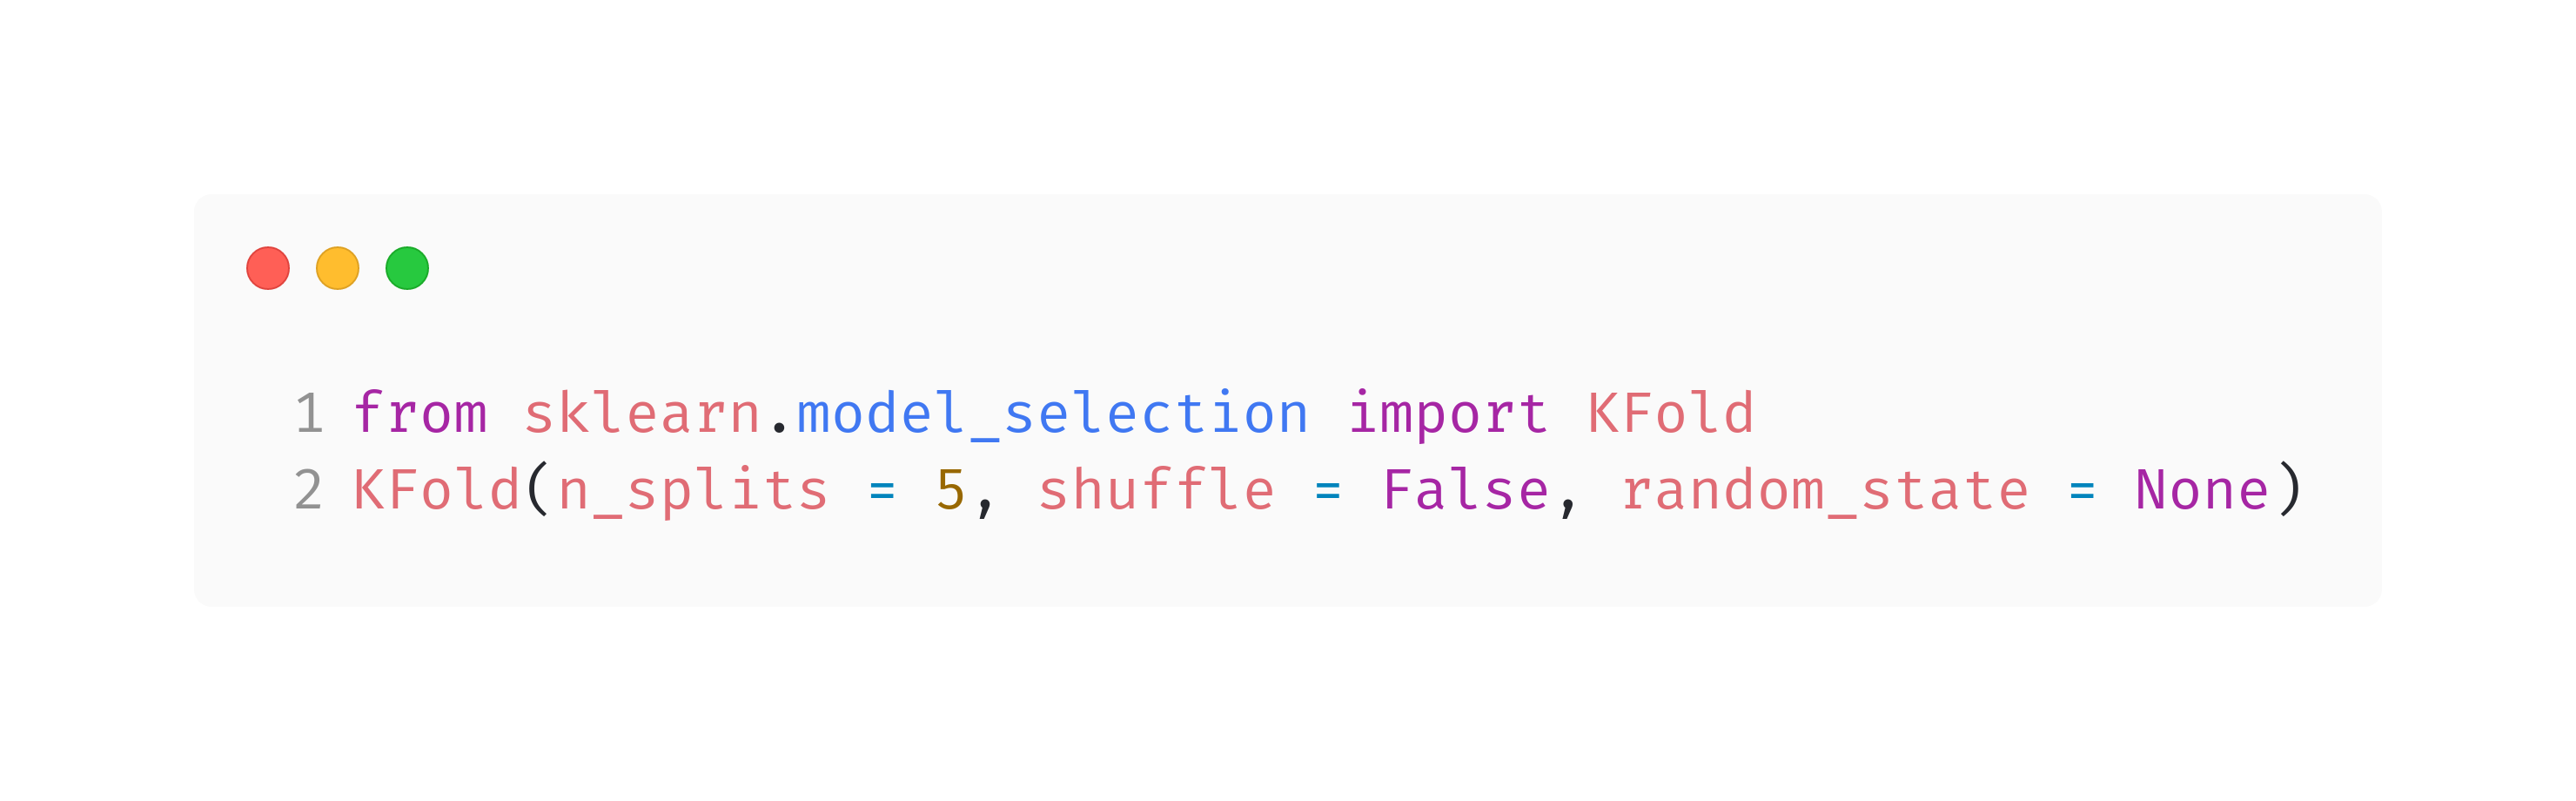

In [34]:
from IPython.display import Image
Image('kfold.png')

**Parámetros**

* `n_splits:` número de folds a utilizar
* `random_state:` valor entero, permite replicar un experimento al setear la semilla de los números aleatorios.
* `shuffle:` booleano, en caso de verdadero los datos se "barajan" antes de ser separados.

**Métodos**

* `split(X[, y, groups]):` Genera los índices para separar los datos de entrenamiento y test.

In [35]:
# Creando el objeto con sus características 
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True)
print(kf)

# Generando los k-fold
temp = kf.split(iris.data)
for train_index, test_index in temp:
    print("TRAIN:", train_index, "\nTEST:", test_index,"\n\n")

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  19
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36  37  38
  39  40  42  43  44  45  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  81  82  83  84  86  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 105 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 135 137
 139 141 142 144 145 146 147 148 149] 
TEST: [ 13  18  27  41  48  80  85  87 104 106 134 136 138 140 143] 


TRAIN: [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  67  68  69  70  72  73  74  75  78
  79  80  81  82  83 

In [36]:
# Analizando el error de un modelo
# Creando los objetos con sus características 
numFolds = 10
kf  = KFold(n_splits = numFolds,shuffle = True)
KNN = KNeighborsClassifier(n_neighbors = 10, weights="uniform")

# Generando los k-fold
temp = kf.split(iris.data)

allAccTest = np.zeros((numFolds,1))
index = 0
for train_index, test_index in temp:
    KNN = KNN.fit(iris.data[train_index,:],iris.target[train_index])
    prediccion = KNN.predict(iris.data[test_index,:])
    allAccTest[index] = mt.accuracy_score(iris.target[test_index],prediccion)
    index += 1
print("Average error: ",allAccTest.mean(),"+-",allAccTest.std())

Average error:  0.9666666666666668 +- 0.04472135954999579


---


#### **Buscando el Mejor valor de K**

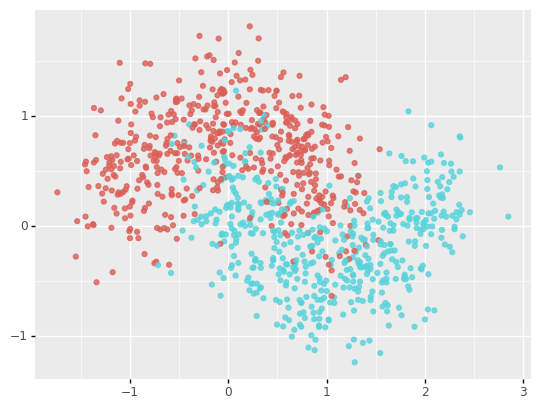

<ggplot: (8784499692900)>

In [37]:
# Generando dos lunas
from sklearn.datasets import make_moons
tempData = make_moons(n_samples = 1000, shuffle = True, noise = 0.3, 
                      random_state = 10)

(
    ggplot() + 
    aes(x = tempData[0][:,0],y = tempData[0][:,1],color = list(map(str,tempData[1]))) + 
    geom_point(show_legend = False, alpha = 0.8)
)

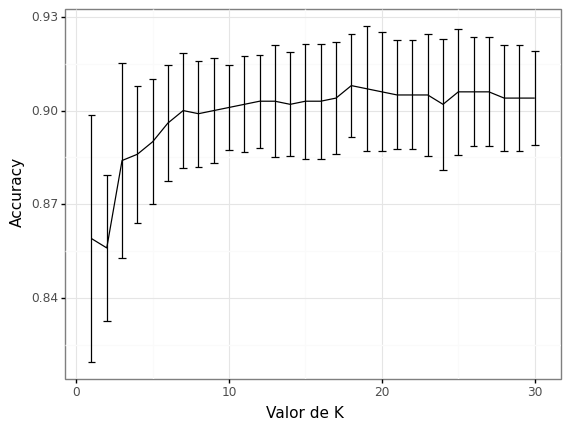

<ggplot: (8784497238489)>

In [40]:
# Analizando el error de un modelo
# Creando los objetos con sus características 
maxK = 30
numFolds = 10
kf = KFold(n_splits = numFolds, shuffle = True, random_state = 0)

allMeanTest = np.zeros((maxK,1))
allStdTest  = np.zeros((maxK,1))
for i in range(maxK):
    index = 0
    tempAcc = np.zeros((numFolds,1))
    KNN = KNeighborsClassifier(n_neighbors = i + 1, weights="uniform")
    for train_index, test_index in kf.split(tempData[0]):
        KNN = KNN.fit(tempData[0][train_index,:],tempData[1][train_index])
        prediccion = KNN.predict(tempData[0][test_index,:])
        tempAcc[index] = mt.accuracy_score(tempData[1][test_index],prediccion)
        index += 1
    allMeanTest[i] = tempAcc.mean()
    allStdTest[i]  = tempAcc.std()    

# Creando el dataframe a graficar
tempDF = pd.DataFrame(allMeanTest,columns=["meanTest"])
tempDF['stdTest'] = allStdTest
tempDF['ejeX'] = np.arange(1, maxK+1, 1)

# Gráfico de los valores
(
    ggplot(tempDF) + 
    aes(x = "ejeX", y = "meanTest",ymin = "meanTest-stdTest", ymax = "meanTest+stdTest") +
    geom_line() + 
    geom_errorbar() +  
    labs(x = "Valor de K", y = "Accuracy") +
    theme_bw()
)
